# LGBM & XGBM

The objective of this assignment is to compare the performance of Light GBM and XG Boost algorithms using the Titanic dataset. 

Exploratory Data Analysis (EDA):

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df1 = pd.read_csv(r"C:\Users\Dell\Downloads\Logistic Regression\Logistic Regression\Titanic_train.csv")
df2 = pd.read_csv(r"C:\Users\Dell\Downloads\Logistic Regression\Logistic Regression\Titanic_test.csv")

In [5]:
if 'Survived' not in df.columns:
    df2['Survived'] = None

In [4]:
df = pd.concat([df1,df2,],ignore_index=True)

In [6]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [11]:
df.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [14]:
#Check for missing values.
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [13]:
df = df.dropna()

Explore data distributions using histograms and box plots.

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

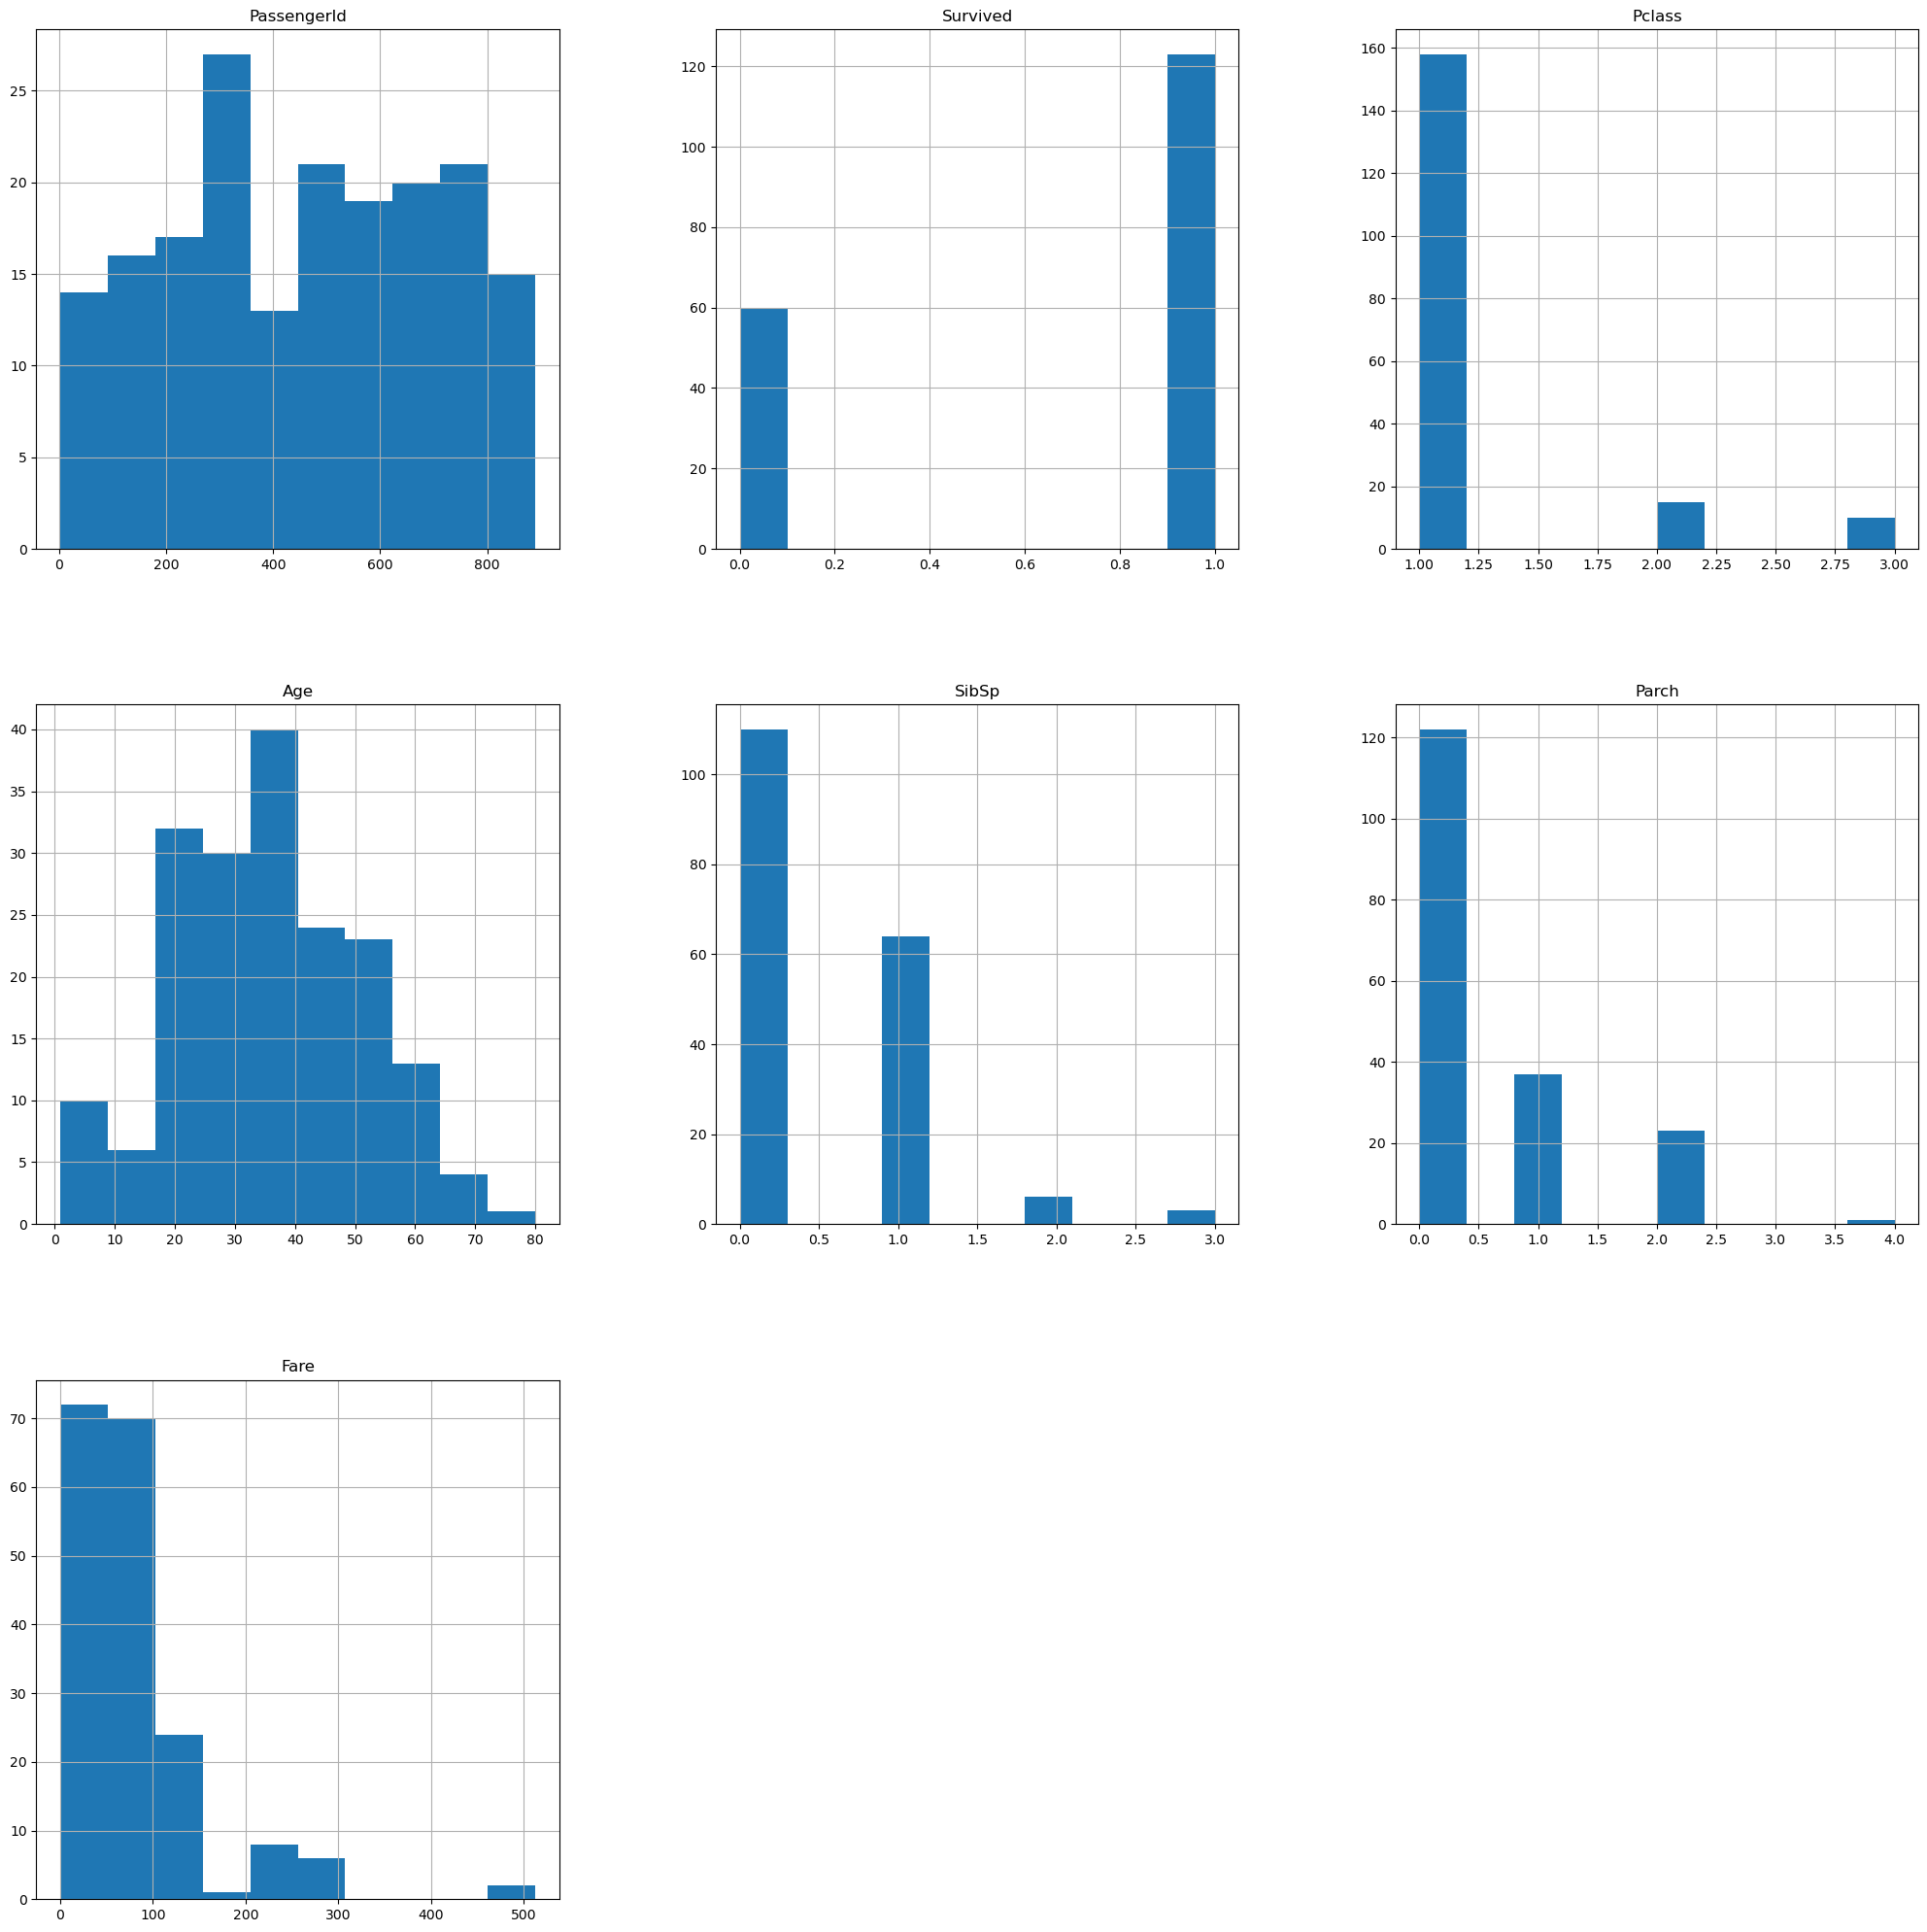

In [25]:
df.hist(figsize=(25,25))

<Axes: >

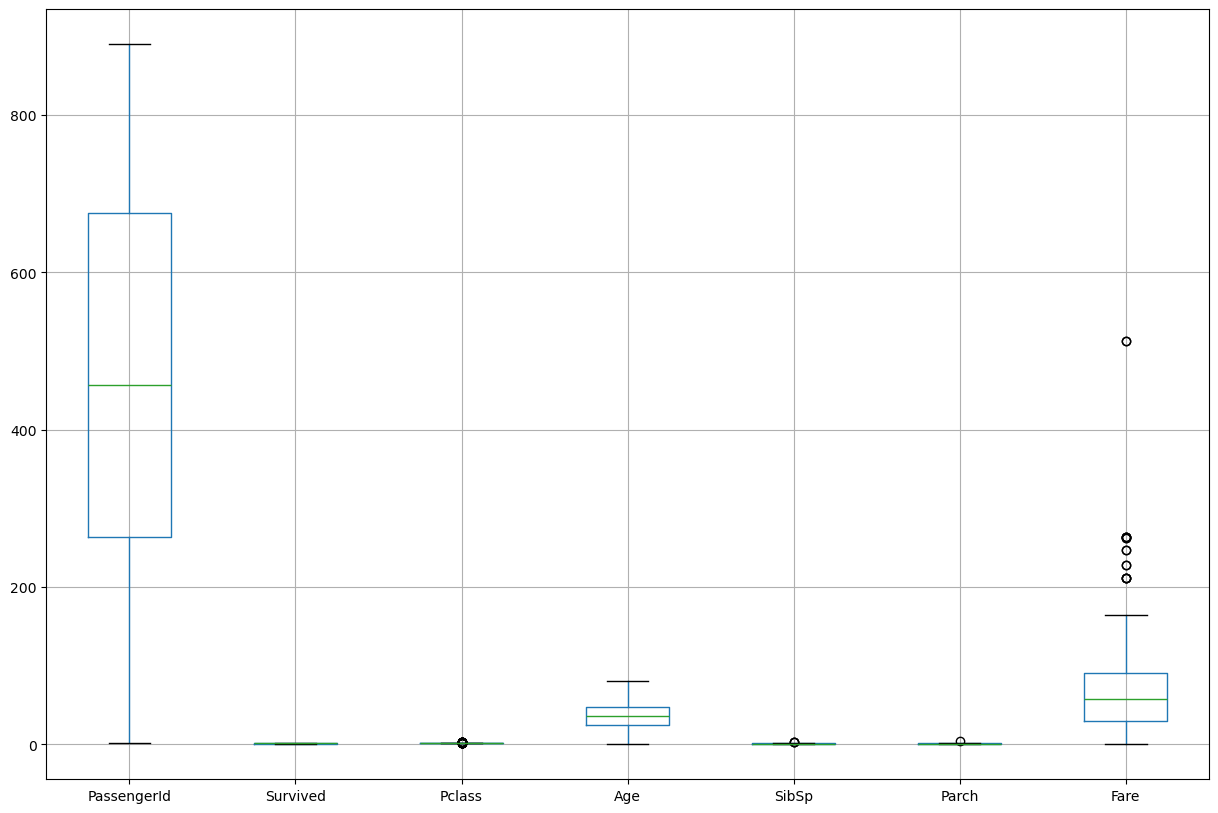

In [23]:
df.boxplot(figsize=(15,10))

Visualize relationships between features and survival using scatter plots and bar plots.

<Axes: xlabel='Age', ylabel='Fare'>

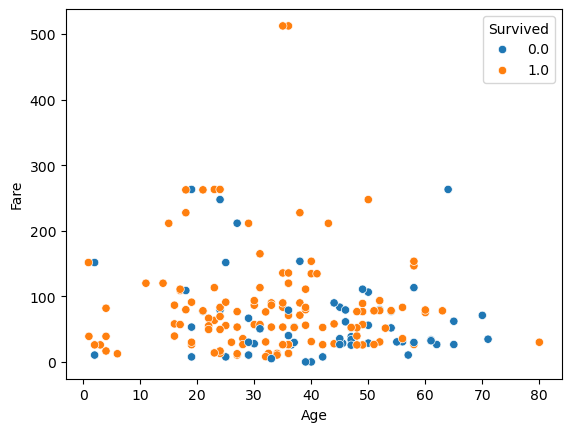

In [26]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)

<Axes: xlabel='Pclass', ylabel='Survived'>

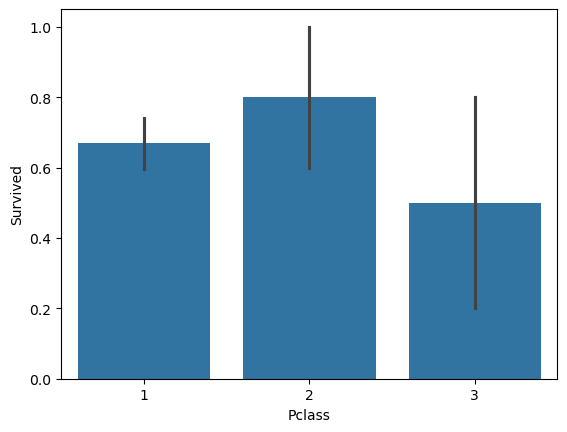

In [27]:
sns.barplot(x='Pclass', y='Survived', data=df)

Data Preprocessing:

In [30]:
from sklearn.preprocessing import LabelEncoder

In [35]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [36]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
6,7,0.0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,2
10,11,1.0,3,"Sandstrom, Miss. Marguerite Rut",0,4.0,1,1,PP 9549,16.7000,G6,2
11,12,1.0,1,"Bonnell, Miss. Elizabeth",0,58.0,0,0,113783,26.5500,C103,2
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1.0,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",0,47.0,1,1,11751,52.5542,D35,2
872,873,0.0,1,"Carlsson, Mr. Frans Olof",1,33.0,0,0,695,5.0000,B51 B53 B55,2
879,880,1.0,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",0,56.0,0,1,11767,83.1583,C50,0
887,888,1.0,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,2


Building Predictive Models:

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
data = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
x = df[data]
y = df['Survived'].values

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [40]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,1,45.5,0,0,28.5000,2
336,1,1,29.0,1,0,66.6000,2
193,2,1,3.0,1,1,26.0000,2
75,3,1,25.0,0,0,7.6500,2
248,1,1,37.0,1,1,52.5542,2
...,...,...,...,...,...,...,...
520,1,0,30.0,0,0,93.5000,2
92,1,1,46.0,1,0,61.1750,2
460,1,1,48.0,0,0,26.5500,2
872,1,1,33.0,0,0,5.0000,2


In [41]:
x_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
118,1,1,24.00,0,1,247.5208,0
251,3,0,29.00,1,1,10.4625,2
742,1,0,21.00,2,2,262.3750,0
544,1,1,50.00,1,0,106.4250,0
712,1,1,48.00,1,0,52.0000,2
96,1,1,71.00,0,0,34.6542,0
139,1,1,24.00,0,0,79.2000,0
337,1,0,41.00,0,0,134.5000,0
577,1,0,39.00,1,0,55.9000,2
492,1,1,55.00,0,0,30.5000,2


In [42]:
y_test

array([0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       0., 0., 1.])

In [43]:
y_train

array([0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 0.])

Build predictive models using LightGBM and XGBoost algorithms.

In [45]:
from xgboost import XGBClassifier

In [47]:
pip install lightgbm

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.4 MB 660.6 kB/s eta 0:00:03
   ------ --------------------------------- 0.2/1.4 MB 2.4 MB/s eta 0:00:01
   --------------- ------------------------ 0.6/1.4 MB 3.5 MB/s eta 0:00:01
   ----------------------- ---------------- 0.8/1.4 MB 4.1 MB/s eta 0:00:01
   --------------------------- ------------ 1.0/1.4 MB 3.7 MB/s eta 0:00:01
   ------------------------------- -------- 1.1/1.4 MB 3.8 MB/s eta 0:00:01
   ----------------------------------- ---- 1.3/1.4 MB 3.7 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 3.6 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 3.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [48]:
import lightgbm as lgb

In [69]:
# LightGBM
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 100, number of negative: 46
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000068 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 92
[LightGBM] [Info] Number of data points in the train set: 146, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.684932 -> initscore=0.776529
[LightGBM] [Info] Start training from score 0.776529
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

LGBMClassifier(random_state=42)

In [70]:
# XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [57]:
y_pred = lgb_model.predict(x_test)

lgb_accuracy = accuracy_score(y_test, y_pred)
lgb_precision = precision_score(y_test,y_pred)
lgb_recall = recall_score(y_test, y_pred)
lgb_f1 = f1_score(y_test, y_pred)

In [58]:
lgb_accuracy
lgb_precision
lgb_recall
lgb_f1

0.7659574468085107

In [59]:
y_pred = xgb_model.predict(x_test)

xgb_accuracy = accuracy_score(y_test,y_pred )
xgb_precision = precision_score(y_test, y_pred )
xgb_recall = recall_score(y_test,y_pred )
xgb_f1 = f1_score(y_test, y_pred)

In [60]:
y_pred

array([0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [61]:
xgb_accuracy
xgb_precision
xgb_recall
xgb_f1

0.7499999999999999

Use techniques like cross-validation and hyperparameter tuning to optimize model performance.

In [63]:
from sklearn.model_selection import GridSearchCV

In [72]:
#LIGHTLGBM
param_grid_lgb = {
    'num_leaves': [31, 63, 127],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500]
}



In [73]:
grid_search_lgb = GridSearchCV(lgb.LGBMClassifier(), param_grid_lgb, cv=5, scoring='accuracy')
grid_search_lgb.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 80, number of negative: 36
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000028 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 73
[LightGBM] [Info] Number of data points in the train set: 116, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.689655 -> initscore=0.798508
[LightGBM] [Info] Start training from score 0.798508
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

GridSearchCV(cv=5, estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [100, 200, 500],
                         'num_leaves': [31, 63, 127]},
             scoring='accuracy')

In [74]:
grid_search_lgb.best_params_

{'learning_rate': 0.01, 'n_estimators': 200, 'num_leaves': 31}

In [75]:
grid_search_lgb.best_score_

0.760919540229885

In [76]:
#XGboost
param_grid_xgb = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500]
}

In [78]:
grid_search_xgb = GridSearchCV(XGBClassifier(), param_grid_xgb, cv=5, scoring='accuracy')
grid_search_xgb.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 500]},
             scoring='accuracy')

In [79]:
grid_search_xgb.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [81]:
grid_search_xgb.best_score_

0.7671264367816092

In [82]:
print("Best parameters for LightGBM:", grid_search_lgb.best_params_)
print("Best accuracy for LightGBM:", grid_search_lgb.best_score_)
print("Best parameters for XGBoost:", grid_search_xgb.best_params_)
print("Best accuracy for XGBoost:", grid_search_xgb.best_score_)

Best parameters for LightGBM: {'learning_rate': 0.01, 'n_estimators': 200, 'num_leaves': 31}
Best accuracy for LightGBM: 0.760919540229885
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best accuracy for XGBoost: 0.7671264367816092


Comparative Analysis:

In [83]:
metrics = {
    'Model': ['LightGBM', 'XGBoost'],
    'Accuracy': [lgb_accuracy, xgb_accuracy],
    'Precision': [lgb_precision, xgb_precision],
    'Recall': [lgb_recall, xgb_recall],
    'F1-Score': [lgb_f1, xgb_f1]
}

metrics_df = pd.DataFrame(metrics)
print(metrics_df)

      Model  Accuracy  Precision    Recall  F1-Score
0  LightGBM  0.702703       0.75  0.782609  0.765957
1   XGBoost  0.675676       0.72  0.782609  0.750000


Visualize and interpret the results

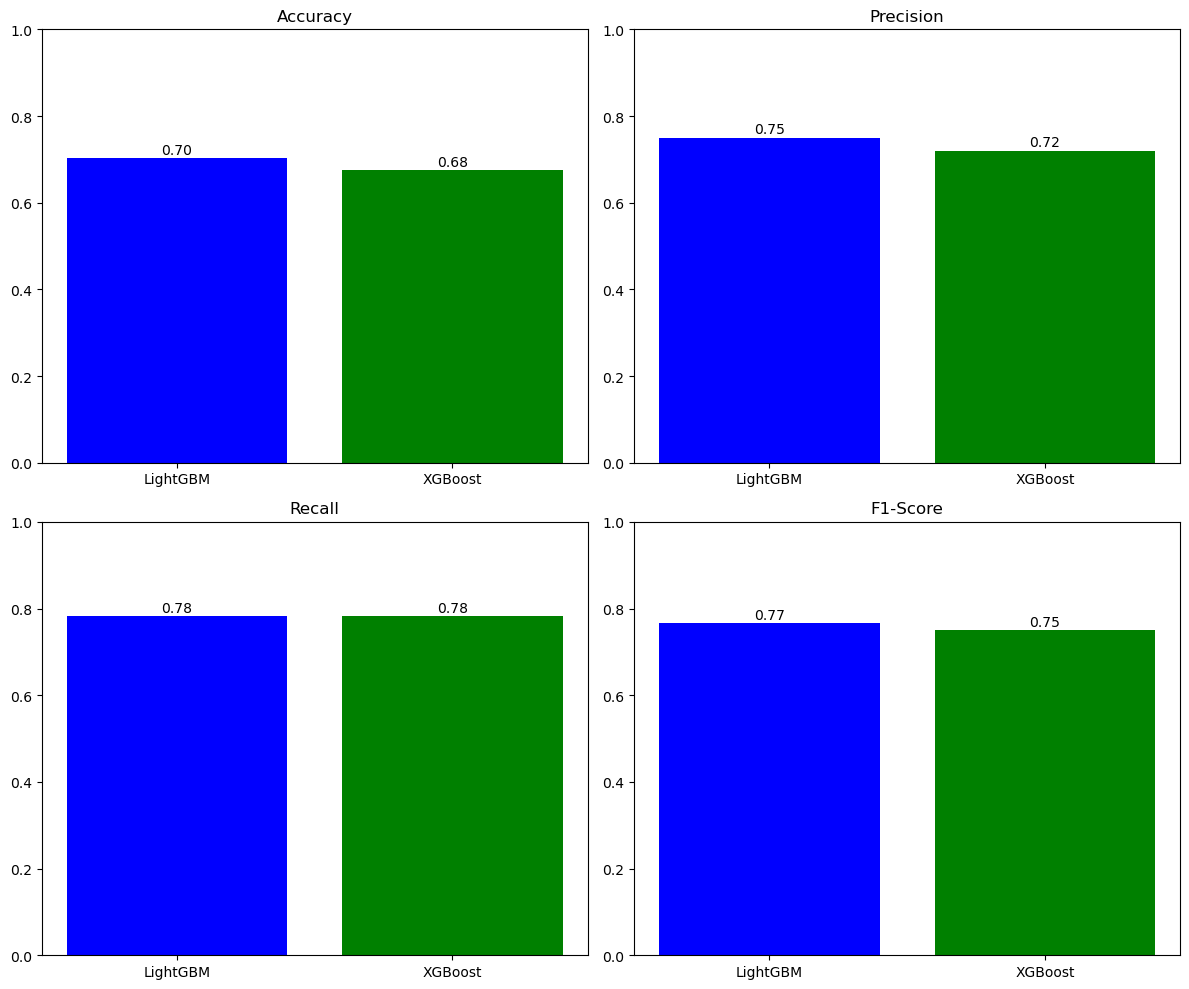

In [84]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10)) #fig: figure of object ,ax: array of axes,
#it will draw grid of subplots

metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score'] #metrics_names:A list containing the names of the metrics to be visualized.
metrics_values = [[lgb_accuracy, xgb_accuracy], [lgb_precision, xgb_precision], #metrics_values:metrics values for LightGBM and xGBoost for metrics.
                  [lgb_recall, xgb_recall], [lgb_f1, xgb_f1]]

for i, ax in enumerate(ax.flatten()):#This loop iterate over each axis in flatten array of axes enumerate provides both the index
    ax.bar(['LightGBM', 'XGBoost'], metrics_values[i], color=['blue', 'green']) #This line plot bar chart,metrics_values[i] provides the metric values for the current metric.
    ax.set_title(metrics_names[i]) #set the title of each plot
    ax.set_ylim(0, 1) #Sets the y-axis limit from 0 to 1, which is common for normalized metrics like accuracy, precision, recall, and F1-score.
    for index, value in enumerate(metrics_values[i]):
        ax.text(index, value + 0.01, f"{value:.2f}", ha='center')

plt.tight_layout()
plt.show()

In [ ]:
#Accuracy: Indicates the overall correctness of the model. If LightGBM shows higher accuracy, it means it predicts the correct labels more often than XGBoost.

#Precision: Measures the correctness of positive predictions. If XGBoost has higher precision, it means it has fewer false positives compared to LightGBM.

#Recall: Reflects the model's ability to identify all positive samples. A higher recall in LightGBM suggests it detects more true positives, even at the risk of including more false positives.

#F1-Score: The harmonic mean of precision and recall. This metric balances the two, providing a single measure of a model's performance when there's an uneven class distribution.

Identifying Strengths and Weaknesses

Strengths of LightGBM: If it consistently shows higher recall, LightGBM might be more suitable for scenarios where catching as many positive cases as possible is crucial, such as medical diagnoses.
Strengths of XGBoost: If XGBoost has higher precision, it may be better for applications where false positives are costly, such as spam detection.
Overall Performance: A balanced evaluation using F1-score can help in situations where both false positives and false negatives are critical.